In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from librosa.core import stft, istft

from play import play

/home/dwiel/anaconda2/lib/python2.7/site-packages/librosa/core/audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [27]:
# freq = 1981
freq = 2000
gensin = np.sin(np.linspace(0, freq*np.pi, 44100)) * (2**15-1)

In [28]:
gensin = np.array(gensin, dtype='int16')

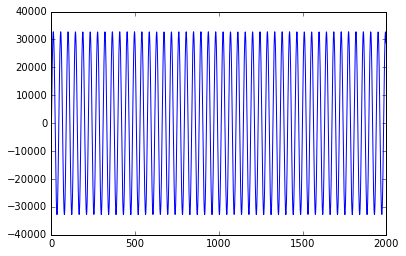

In [29]:
plot(gensin[:2000])

In [26]:
play(gensin)

In [24]:
dsin = stft(gensin, n_fft=2048, hop_length=2048)

In [104]:
def imshowsq(m):
    """ A helper for showing spectrograms forces to square aspect ratio with no interpolation """
    imshow(m, aspect=float(m.shape[1]) / m.shape[0], interpolation='none')
    colorbar()

In [105]:
binlo = 38
binhi = 54

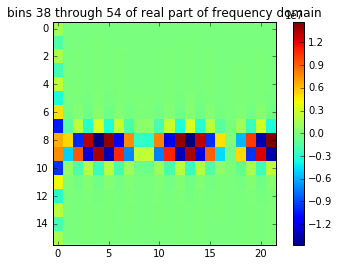

In [106]:
imshowsq(dsin.real[binlo:binhi,:])
title('bins {} through {} of real part of frequency domain'.format(binlo, binhi))

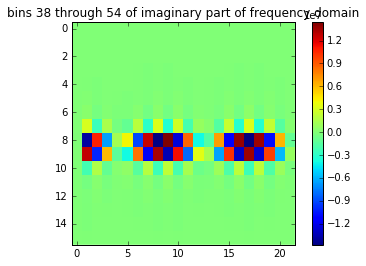

In [107]:
imshowsq(dsin.imag[binlo:binhi,:])
title('bins {} through {} of imaginary part of frequency domain'.format(binlo, binhi))

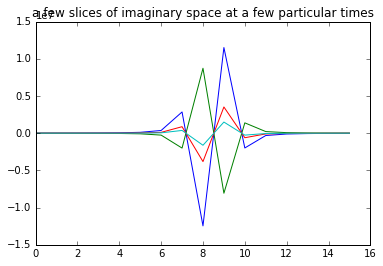

In [108]:
plot(dsin.imag[binlo:binhi,10])
plot(dsin.imag[binlo:binhi,11])
plot(dsin.imag[binlo:binhi,12])
plot(dsin.imag[binlo:binhi,13])
title('a few slices of imaginary space at a few particular times')

### See [here](http://music.columbia.edu/cmc/MusicAndComputers/popups/chapter3/xbit_3_3.php) for real/imaginary vs magnitude/phase

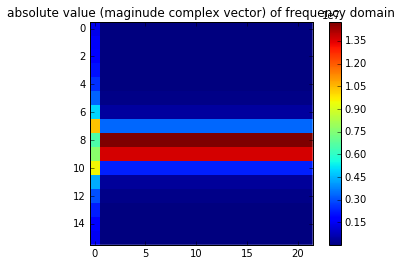

In [113]:
imshowsq(abs(dsin)[binlo:binhi,:])
title('absolute value (maginude complex vector) of frequency domain')

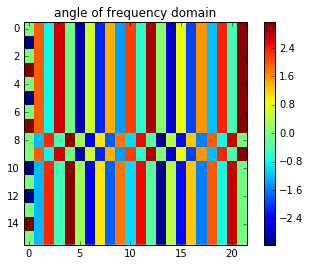

In [114]:
imshowsq(np.angle(dsin)[binlo:binhi,:])
title('angle of frequency domain')

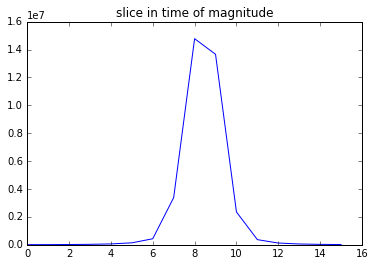

In [118]:
plot(np.abs(dsin)[38:54,11])
title('slice in time of magnitude')

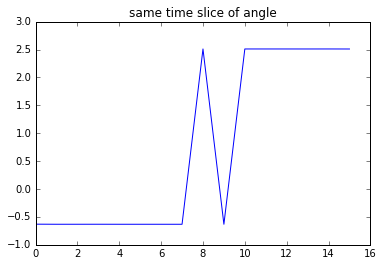

In [119]:
plot(np.angle(dsin)[38:54,11])
title('same time slice of angle')

(18, 74)

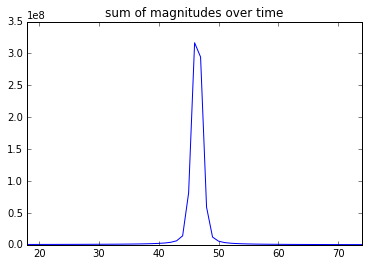

In [126]:
plot(np.sum(abs(dsin), axis=1))
title('sum of magnitudes over time')
xlim(binlo-20,binhi+20)

(18, 74)

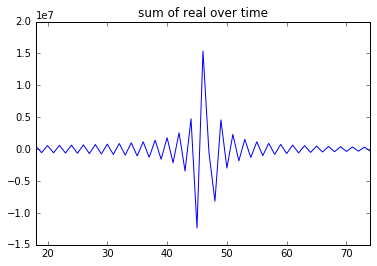

In [128]:
plot(np.sum(dsin.real, axis=1))
title('sum of real over time')
xlim(binlo-20,binhi+20)

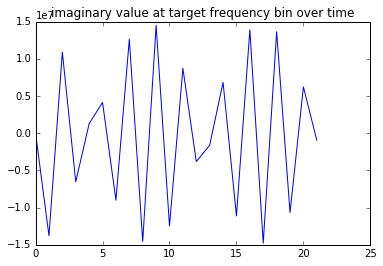

In [131]:
# this appears to be some beat frequency combining sin frequency and fft window frequency
plot(dsin.imag[46,:])
title('imaginary value at target frequency bin over time')

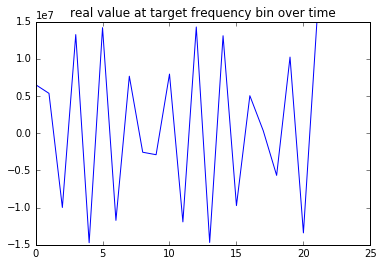

In [132]:
plot(dsin.real[46,:])
title('real value at target frequency bin over time')

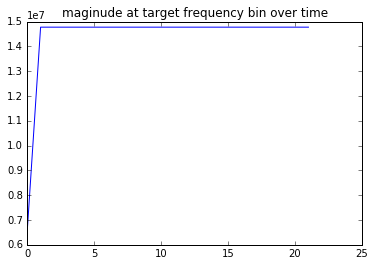

In [133]:
plot(np.abs(dsin[46,:]))
title('maginude at target frequency bin over time')

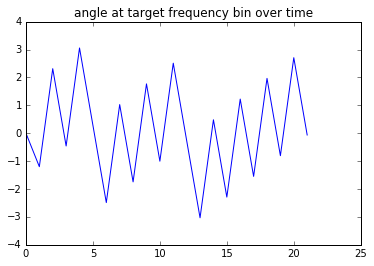

In [134]:
plot(np.angle(dsin)[46,:])
title('angle at target frequency bin over time')

In [78]:
np.fft.fftfreq(dsin.shape[0])*44100

array([   0.        ,   43.02439024,   86.04878049, ..., -129.07317073,
        -86.04878049,  -43.02439024])

In [79]:
# given number of bins in freq space in D and sample rate, lookup
# frequence of sound in bin 46 which matches ~2khz sin wave
# generated above
(np.fft.fftfreq(dsin.shape[0])*44100)[46]

1979.1219512195121

In [30]:
# TODO: now show same plots, but with a different frequency band closer to 1979
# TODO: any way to make these plots change as a slider changes the frequency